In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
lifestyle_data = pd.read_csv('L&R.csv')
rel_cols = ['What percentage of your high school friends do you still keep in touch/are still friends with?',
           'What percentage of your current friends are in SYDE?',
           'What percentage of the class could you name? (Intervals are in +10%)']
df = lifestyle_data[rel_cols].dropna().rename(columns={'What percentage of your high school friends do you still keep in touch/are still friends with?': 'highschool',
                                                      'What percentage of your current friends are in SYDE?' : 'syde',
                                                      'What percentage of the class could you name? (Intervals are in +10%)' : 'What percentage of the class can you name'})
df.head()

,highschool,syde,What percentage of the class can you name
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0


In [3]:
group_highschool = df.groupby('highschool')['highschool'].count()
group_syde = df.groupby('syde')['syde'].count()
group_name = df.groupby('What percentage of the class can you name')['What percentage of the class can you name'].count()
group_highschool
#group_syde
#group_name

highschool
0.0      1
1.0      7
2.0      5
3.0      9
4.0      8
5.0     11
6.0     11
7.0      6
8.0     10
9.0     17
10.0     5
Name: highschool, dtype: int64

In [4]:
df['Number of People'] = df.groupby(['highschool'])['highschool'].transform('count')
df

,highschool,syde,What percentage of the class can you name,Number of People
0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,7
2,1.0,0.0,1.0,7
3,1.0,0.0,1.0,7
4,1.0,0.0,1.0,7
...,...,...,...,...
85,10.0,9.0,8.0,5
86,10.0,9.0,9.0,5
87,10.0,9.0,9.0,5
88,10.0,9.0,9.0,5


In [5]:
total = df['Number of People'].sum()
total
syde_sum = df['syde'].sum()
highschool_sum =df['highschool'].sum()
name_sum = df['What percentage of the class can you name'].sum()

In [6]:
df['Percentage of people'] = ((df['Number of People'] / total) * 100) *100
df

,highschool,syde,What percentage of the class can you name,Number of People,Percentage of people
0,0.0,0.0,0.0,1,10.964912
1,1.0,0.0,0.0,7,76.754386
2,1.0,0.0,1.0,7,76.754386
3,1.0,0.0,1.0,7,76.754386
4,1.0,0.0,1.0,7,76.754386
...,...,...,...,...,...
85,10.0,9.0,8.0,5,54.824561
86,10.0,9.0,9.0,5,54.824561
87,10.0,9.0,9.0,5,54.824561
88,10.0,9.0,9.0,5,54.824561


In [7]:
syde_percentage = ((syde_sum / total)*100)
syde_percentage

40.57017543859649

In [8]:
highschool_percentage = ((highschool_sum / total)*100)
highschool_percentage

57.23684210526315

In [9]:
name_percentage = ((name_sum/total)*100)
name_percentage

42.10526315789473

In [10]:
x = ['syde', 'highschool']
y = [41,57]

T:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Text' object has no attribute 'containers'

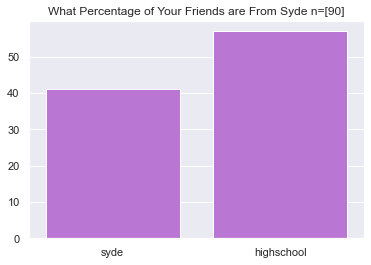

In [12]:
sns.set(font_scale=1.2)
sns.set_theme(palette="dark")
graph = sns.barplot(x, y ,  color = '#C067E2').set_title('What Percentage of Your Friends are From Syde n=[90]')
plt.bar_label(graph.containers[0])
plt.ylabel("Friends (%)")


In [13]:
graph.figure.savefig('graphs/Friends_SYde_VS_Highschool.png')